**J Matheus**

# **Casilla de código base (Ejecute siempre antes de usar el solucionador, no modifique).**

In [ ]:

# --- 1. IMPORTACIONES ---
# Herramientas para matemáticas, gráficos y análisis de funciones
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import sympify, lambdify, symbols
from sympy.core.sympify import SympifyError

# --- 2. DEFINICIÓN DE LA CLASE SOLVER ---

class FixedPointSolver:
    """
    Implementa el método de Punto Fijo (Iteración simple).

    Atributos:
        g (callable): La función de iteración g(x), donde x = g(x).
        iterations (int): Número de iteraciones realizadas.
        root (float): La raíz (punto fijo) encontrada.
        error (float): El error final estimado |x_nuevo - x_viejo|.
        history (list): Lista que almacena la secuencia de x_i.
    """

    def __init__(self, g):
        """
        Inicializa el solver con la función de iteración g(x).
        """
        if not callable(g):
            raise TypeError("El parámetro 'g' debe ser una función (callable).")
        self.g = g
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = [] # Almacenará la secuencia de x_i

    def solve(self, x0, tol=1e-7, max_iter=100):
        """
        Encuentra la raíz (punto fijo) de g(x) comenzando en x0.

        :param x0: Suposición inicial.
        :param tol: Tolerancia. Se detiene cuando |x_nuevo - x_viejo| < tol.
        :param max_iter: Número máximo de iteraciones.
        :return: La raíz aproximada.
        :raises RuntimeError: Si la iteración diverge o encuentra NaN.
        """
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = [x0] # Guardar el punto inicial

        x_prev = x0

        for i in range(max_iter):
            self.iterations = i + 1

            try:
                # --- Fórmula de Punto Fijo ---
                x_new = self.g(x_prev)
            except (OverflowError, ValueError, ZeroDivisionError):
                 raise RuntimeError(f"Error matemático en la iteración {i+1} (p.ej. log(negativo) o división por cero).")

            self.history.append(x_new)

            # --- Criterio de parada y error ---
            current_error = abs(x_new - x_prev)

            # Chequeo de divergencia / NaN
            if abs(x_new) > 1e100 or math.isnan(x_new):
                self.root, self.error = x_new, current_error
                print(f"\nAdvertencia: La iteración divergió en el paso {self.iterations}.")
                raise RuntimeError("La iteración divergió o produjo NaN.")

            # Criterio de parada
            if current_error < tol:
                self.root, self.error = x_new, current_error
                return x_new

            # Preparar la siguiente iteración
            x_prev = x_new

        # Si se alcanza max_iter
        self.root, self.error = x_new, current_error
        print(f"\nAdvertencia: Se alcanzó el máximo de iteraciones ({max_iter}) "
              f"sin alcanzar la tolerancia de {tol}.")
        return self.root

    def plot_results(self):
        """
        Genera el diagrama de telaraña (cobweb) y el gráfico de convergencia.
        """
        if self.root is None or len(self.history) < 2:
            print("Error: Ejecute el método 'solve()' antes de intentar graficar.")
            return

        plt.figure(figsize=(12, 5))

        # --- Gráfico 1: Diagrama de Telaraña (Cobweb Plot) ---
        plt.subplot(1, 2, 1)

        min_x, max_x = min(self.history), max(self.history)
        rango = max(abs(max_x - min_x), abs(self.root)*0.2, 1.0)
        plot_min, plot_max = min_x - rango * 0.2, max_x + rango * 0.2

        x_vals = np.linspace(plot_min, plot_max, 400)

        # Evaluar g(x) de forma segura para el gráfico
        g_vals = []
        for xi in x_vals:
            try:
                g_val = self.g(xi)
                if math.isnan(g_val): g_val = np.nan
            except (ValueError, ZeroDivisionError):
                g_val = np.nan
            g_vals.append(g_val)

        #[Image of Fixed-point iteration cobweb diagram]
        plt.plot(x_vals, g_vals, label='g(x)')
        plt.plot(x_vals, x_vals, 'gray', linestyle='--', label='y=x')

        # Dibujar la "telaraña"
        for i in range(len(self.history) - 1):
            x_i = self.history[i]
            x_i_plus_1 = self.history[i+1]
            if math.isnan(x_i) or math.isnan(x_i_plus_1): break

            plt.plot([x_i, x_i], [self.g(x_i) if i==0 else self.history[i], x_i_plus_1], 'r--', lw=0.8)
            plt.plot([x_i, x_i_plus_1], [x_i_plus_1, x_i_plus_1], 'r--', lw=0.8)

        plt.plot(self.root, self.g(self.root), 'ro', markersize=8, label=f'Punto Fijo ({self.root:.4f})')
        plt.title('Diagrama de Telaraña (Punto Fijo)')
        plt.xlabel('x'); plt.ylabel('g(x)  |  y')
        plt.grid(True); plt.legend()
        plt.ylim(plot_min, plot_max) # Ajustar ejes

        # --- Gráfico 2: Convergencia ---
        plt.subplot(1, 2, 2)
        errors = [abs(self.history[i+1] - self.history[i]) for i in range(len(self.history) - 1)]
        iterations = range(1, len(errors) + 1)

        plt.semilogy(iterations, errors, '-o', label='Error |x_i+1 - x_i|')
        plt.title('Convergencia (Punto Fijo)'); plt.xlabel('Iteración'); plt.ylabel('Error (log scale)')
        plt.grid(True, which="both", ls="--"); plt.legend()

        plt.tight_layout()
        plt.show()

#*Solucionador; ejecute la siguiente casilla y siga los pasos para obtener los resultados. Utilicelo cuántas veces sea necesario. (La eficacia de este método depende de su habilidad para escoger g(x))*

--- Solucionador de Ecuaciones (Método de Punto Fijo) ---
ADVERTENCIA: El éxito depende de una buena elección de g(x).

Problema de ejemplo: Encontrar la raíz de f(x) = x^2 - 2x - 3 = 0 (Raíz es 3)
  Intento 1 (Diverge): g(x) = (x**2 - 3) / 2
  Intento 2 (Converge): g(x) = sqrt(2*x + 3)
------------------------------------------------------------
Ingrese la función g(x) (use 'x' como variable): exp(-x)
Función de iteración: g(x) = exp(-x)
------------------------------------------------------------
Ingrese la suposición inicial (x0) (p.ej. 4): 0.5
Ingrese la tolerancia (o presione Enter para 1e-7): 

Iniciando FixedPointSolver para g(x) con x0 = 0.5...

--- Resultados Técnicos del Solver (Punto Fijo) ---
Raíz encontrada (Punto Fijo): 0.56714326
Valor de g(raíz):           0.56714331
(Deberían ser casi idénticos)
Iteraciones:                26
Error estimado |x_i+1 - x_i|: 7.47e-08

      --- Resumen de Estimación para el Cliente ---

Proyecto: Análisis de la función de iteración g(x) =

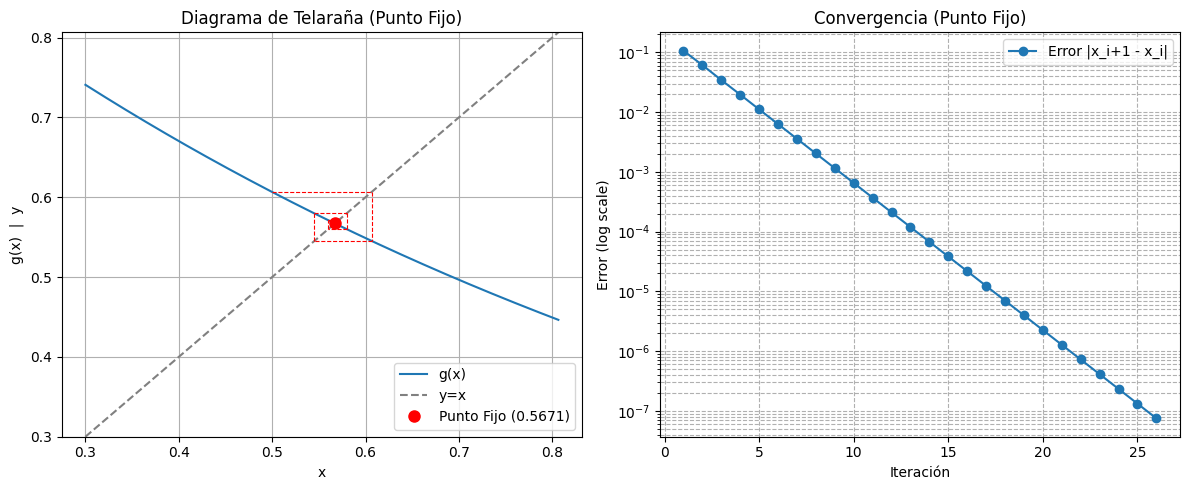

In [ ]:
# --- CELDA 2: SCRIPT INTERACTIVO (PUNTO FIJO) ---
# (Ejecuta esta celda después de la Celda 1)

print("--- Solucionador de Ecuaciones (Método de Punto Fijo) ---")
print("ADVERTENCIA: El éxito depende de una buena elección de g(x).")
print("\nProblema de ejemplo: Encontrar la raíz de f(x) = x^2 - 2x - 3 = 0 (Raíz es 3)")
print("  Intento 1 (Diverge): g(x) = (x**2 - 3) / 2")
print("  Intento 2 (Converge): g(x) = sqrt(2*x + 3)")
print("-" * 60)

try:
    # --- 1. Pedir Función g(x) ---
    func_string = input("Ingrese la función g(x) (use 'x' como variable): ")

    x = symbols('x')
    expr = sympify(func_string)
    mi_g_funcion = lambdify(x, expr, 'math') # La pasamos a 'math' para sqrt, etc.

    print(f"Función de iteración: g(x) = {expr}")
    print("-" * 60)

    # --- 2. Pedir Punto Inicial ---
    x0_input = input("Ingrese la suposición inicial (x0) (p.ej. 4): ")
    x0_val = float(x0_input)

    # --- 3. Pedir Tolerancia ---
    tol_input = input(f"Ingrese la tolerancia (o presione Enter para 1e-7): ")
    if tol_input == "": tol_val = 1e-7
    else: tol_val = float(tol_input)

    # --- 4. Crear y usar el solver de Punto Fijo ---
    solver_puntofijo = FixedPointSolver(g=mi_g_funcion)

    print(f"\nIniciando FixedPointSolver para g(x) con x0 = {x0_val}...")
    raiz_aprox = solver_puntofijo.solve(x0=x0_val, tol=tol_val, max_iter=50)

    # --- 5. Calcular g(raíz) ---
    g_en_raiz = mi_g_funcion(solver_puntofijo.root)

    # --- 6. Reporte Técnico ---
    print("\n--- Resultados Técnicos del Solver (Punto Fijo) ---")
    print(f"Raíz encontrada (Punto Fijo): {solver_puntofijo.root:.8f}")
    print(f"Valor de g(raíz):           {g_en_raiz:.8f}")
    print(f"(Deberían ser casi idénticos)")
    print(f"Iteraciones:                {solver_puntofijo.iterations}")
    print(f"Error estimado |x_i+1 - x_i|: {solver_puntofijo.error:.2e}")

    # --- 7. Resumen para el Cliente ---
    print("\n" + "="*60)
    print("      --- Resumen de Estimación para el Cliente ---")
    print("="*60)
    print(f"\nProyecto: Análisis de la función de iteración g(x) = {expr}")
    print("\n> **1. Problema:**")
    print(f"> Se nos solicitó encontrar el 'punto fijo' (el valor 'x' donde g(x) = x) \n> para la formulación proporcionada.")
    print("\n> **2. Estimación de la Solución:**")
    print(f"> El valor 'x' que es un punto fijo es: **{solver_puntofijo.root:.10f}**")
    print("\n> **3. Nivel de Confianza (Precisión):**")
    print(f"> La estimación es de alta precisión. La diferencia entre la entrada (x) y la salida (g(x)) \n> es de {abs(solver_puntofijo.root - g_en_raiz):.2e} (un número extremadamente cercano a cero).")
    print(f"> El cálculo se completó eficientemente en **{solver_puntofijo.iterations} pasos**.")
    print("\n> **4. Visualización:**")
    print(f"> A continuación, se presentan los gráficos que ilustran cómo la iteración \n> 'convergió' en la solución.")
    print("="*60 + "\n")

    # --- 8. Generar los GRÁFICOS ---
    solver_puntofijo.plot_results()

except (SympifyError, ValueError, RuntimeError) as e:
    print(f"\n[ERROR] Ocurrió un problema:")
    print(f"{e}")
except Exception as e:
    print(f"\n[ERROR INESPERADO] {e}")